## 1. Requeriments

In [392]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [393]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

## 3. Graph building

### 3.1. Gene matrix

In [394]:
genes = pd.read_csv('..\..\Data\PPT-Ohmnet\mRCC_big_pool\mrcc_protein_matrix_260_genes_60_nodes.csv')
Y = genes.Y

genes = genes.iloc[:,1:61] 
genes

,ABCB1,ACTN4,AHR,AKT1,ALDOA,ANGPT2,ANXA2,APLP2,AR,AVPR2,...,TFAP2A,TGFA,TGFB1,TICAM2,TRIM33,VCAM1,VDR,VHL,VIM,WWOX
0,36.716012,36.959376,33.703947,34.434275,39.088717,31.811998,37.396638,35.117897,31.958028,21.798427,...,29.99648,32.63708,36.03410,27.27919,33.58841,35.69036,30.00450,32.30615,39.80908,33.19217
1,34.174577,37.518350,33.396665,34.152701,38.620345,33.320691,36.570671,36.333607,32.397556,28.195565,...,24.39572,31.50477,34.85872,22.41477,34.75536,36.56088,31.02120,32.19988,40.71898,34.09405
2,31.225510,36.873023,33.242494,35.449119,39.911612,31.265365,38.443020,38.159919,31.120869,27.681169,...,29.22146,29.29853,35.32421,26.21874,34.60949,35.28440,31.79667,31.49147,40.34750,33.91476
3,32.988641,37.890871,34.131470,34.220278,38.846657,33.274708,37.244829,36.006827,29.255782,26.728221,...,24.39572,29.62080,35.36688,27.19268,35.13094,33.99246,29.70039,32.11538,40.65484,33.56484
4,33.284849,37.205900,34.934910,33.973368,37.164325,33.456080,36.871693,36.642209,28.876694,21.798427,...,32.82296,22.40661,34.85384,22.41477,33.77973,33.43134,30.09807,33.33646,40.15191,34.11384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,33.838323,37.594156,33.741687,35.057571,38.497189,32.469349,37.436964,35.771920,29.211709,31.363610,...,33.40614,31.18734,36.11363,23.99949,33.99384,32.59761,30.18159,31.79913,41.08211,34.02174
177,31.895951,35.376233,35.583590,32.553513,38.493140,30.530621,37.635004,34.864511,31.310019,25.377370,...,25.03096,29.25294,32.49470,27.71255,34.98453,35.99542,27.86996,31.66344,38.35806,33.66248
178,33.842290,37.319844,34.810372,34.807825,37.746201,32.870260,37.953757,35.950357,29.616077,25.377370,...,29.32538,31.73532,35.32101,27.52222,34.09657,33.37020,30.79683,32.39461,39.71891,34.17006
179,34.715293,37.585553,34.602117,34.787403,38.003106,33.139063,35.957212,35.187268,32.887222,28.818005,...,30.07225,31.29793,35.29660,22.09014,34.32754,34.72990,31.35321,32.34561,39.89945,33.63385


In [395]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,ABCB1,ACTN4,AHR,AKT1,ALDOA,ANGPT2,ANXA2,APLP2,AR,AVPR2,...,TFAP2A,TGFA,TGFB1,TICAM2,TRIM33,VCAM1,VDR,VHL,VIM,WWOX
0,0.913055,0.476142,0.387706,0.432669,0.667977,0.523887,0.596683,0.184133,0.719726,0.051504,...,0.685183,0.919779,0.722144,0.814367,0.265790,0.657322,0.647393,0.681580,0.604810,0.492310
1,0.611207,0.644258,0.325788,0.367893,0.571046,0.782705,0.390935,0.500789,0.761528,0.664076,...,0.382137,0.825208,0.506676,0.398011,0.539984,0.761021,0.724137,0.664154,0.761269,0.629339
2,0.260945,0.450171,0.294722,0.666134,0.838277,0.430111,0.857336,0.976488,0.640107,0.614819,...,0.643248,0.640941,0.592008,0.723601,0.505710,0.608963,0.782673,0.547991,0.697392,0.602099
3,0.470353,0.756297,0.473853,0.383439,0.617882,0.774816,0.558867,0.415673,0.462727,0.523567,...,0.382137,0.667857,0.599831,0.806962,0.628233,0.455065,0.624437,0.650298,0.750240,0.548933
4,0.505534,0.550286,0.635748,0.326638,0.269718,0.805931,0.465919,0.581171,0.426674,0.051504,...,0.838119,0.065323,0.505781,0.398011,0.310744,0.388223,0.654456,0.850528,0.663760,0.632346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.571270,0.667058,0.395311,0.576058,0.545558,0.636656,0.606728,0.354486,0.458536,0.967440,...,0.869674,0.798696,0.736724,0.533651,0.361052,0.288907,0.660760,0.598440,0.823710,0.618353
177,0.340574,0.000000,0.766458,0.000000,0.544720,0.304065,0.656060,0.118134,0.658097,0.394214,...,0.416508,0.637133,0.073307,0.851459,0.593832,0.693662,0.486269,0.576190,0.355304,0.563768
178,0.571741,0.584556,0.610653,0.518604,0.390139,0.705433,0.735461,0.400964,0.496993,0.394214,...,0.648871,0.844464,0.591422,0.835168,0.385191,0.380940,0.707201,0.696085,0.589305,0.640888
179,0.675428,0.664470,0.568690,0.513906,0.443306,0.751546,0.238123,0.202202,0.808098,0.723679,...,0.689283,0.807932,0.586947,0.370225,0.439461,0.542910,0.749199,0.688050,0.620349,0.559418


### 3.2. Graph edges

In [396]:
path ='../../Data/PPT-Ohmnet/mRCC_big_pool/network_edges_mrcc_260_genes_60_nodes.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [397]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [398]:
edge_index

array(['CDKN2A', 'CDKN2A', 'CDKN2A', 'CDKN2A', 'EPO', 'EPO', 'ERBB2',
       'ERBB2', 'ERBB2', 'ERBB2', 'ERBB2', 'ERBB2', 'ERBB3', 'HIF1A',
       'HIF1A', 'HIF1A', 'HIF1A', 'HIF1A', 'HIF1A', 'HIF1A', 'HIF1A',
       'HIF1A', 'HIF1A', 'WWOX', 'WWOX', 'AVPR2', 'PATZ1', 'INSR', 'INSR',
       'INSR', 'ACTN4', 'ACTN4', 'ACTN4', 'ACTN4', 'ACTN4', 'ACTN4',
       'CCND1', 'CCND1', 'CCND1', 'CCND1', 'JADE1', 'JADE1', 'JADE1',
       'PTEN', 'PTEN', 'PTEN', 'PTEN', 'PTEN', 'PTEN', 'PTEN', 'TICAM2',
       'HNF4A', 'HNF4A', 'HNF4A', 'HNF4A', 'NDRG2', 'STAT3', 'STAT3',
       'STAT3', 'STAT3', 'STAT3', 'STAT3', 'MAP3K5', 'ABCB1', 'PIK3CB',
       'PIK3CB', 'AHR', 'AHR', 'AHR', 'AKT1', 'AKT1', 'AKT1', 'AKT1',
       'AKT1', 'AKT1', 'AKT1', 'AKT1', 'MMP9', 'MMP9', 'MMP9', 'ALDOA',
       'ALDOA', 'ALDOA', 'CXCL12', 'VCAM1', 'VCAM1', 'VCAM1', 'DNMT1',
       'RBX1', 'RBX1', 'DNMT3A', 'VDR', 'KPNA2', 'VHL', 'VHL', 'VHL',
       'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'VIM', 'VIM', 'VIM',
       '

In [399]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

60

In [400]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [401]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [402]:
edge_index

array([[14, 14, 14, 14, 23, 23, 24, 24, 24, 24, 24, 24, 25, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 59, 59,  9, 39, 30, 30, 30,  1,  1,
         1,  1,  1,  1, 11, 11, 11, 11, 31, 31, 31, 42, 42, 42, 42, 42,
        42, 42, 53, 29, 29, 29, 29, 38, 47, 47, 47, 47, 47, 47, 33,  0,
        40, 40,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3, 35, 35, 35,
         4,  4,  4, 17, 55, 55, 55, 18, 44, 44, 19, 56, 32, 57, 57, 57,
        57, 57, 57, 57, 57, 57, 58, 58, 58,  5, 26, 26, 26, 26,  6,  7,
        43, 49, 49, 50, 50, 50,  8,  8, 15, 54, 54, 36, 22, 13, 41, 16,
        14],
       [11, 28, 57, 26, 27, 29, 47, 20, 16, 13, 25, 51,  3, 44, 26, 59,
        21, 16, 57, 42, 34, 47,  8, 39,  6, 34,  8, 20, 41, 34, 16, 26,
        56, 55,  4, 32,  8, 44, 47, 16, 16,  3, 57, 40,  3, 48,  8,  6,
        16, 10, 41,  8, 56, 16, 34,  3, 41, 36, 18,  8, 34, 13,  3, 41,
        41,  3, 44,  8, 16, 37,  8, 18,  7,  4, 36, 16, 58, 26, 52, 13,
        46, 55, 26, 26,  6, 58, 32, 19, 57, 16, 50,

In [403]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[14, 14, 14, 14, 23, 23, 24, 24, 24, 24, 24, 24, 25, 28, 28, 28, 28, 28,
         28, 28, 28, 28, 28, 59, 59,  9, 39, 30, 30, 30,  1,  1,  1,  1,  1,  1,
         11, 11, 11, 11, 31, 31, 31, 42, 42, 42, 42, 42, 42, 42, 53, 29, 29, 29,
         29, 38, 47, 47, 47, 47, 47, 47, 33,  0, 40, 40,  2,  2,  2,  3,  3,  3,
          3,  3,  3,  3,  3, 35, 35, 35,  4,  4,  4, 17, 55, 55, 55, 18, 44, 44,
         19, 56, 32, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58,  5, 26, 26,
         26, 26,  6,  7, 43, 49, 49, 50, 50, 50,  8,  8, 15, 54, 54, 36, 22, 13,
         41, 16, 14],
        [11, 28, 57, 26, 27, 29, 47, 20, 16, 13, 25, 51,  3, 44, 26, 59, 21, 16,
         57, 42, 34, 47,  8, 39,  6, 34,  8, 20, 41, 34, 16, 26, 56, 55,  4, 32,
          8, 44, 47, 16, 16,  3, 57, 40,  3, 48,  8,  6, 16, 10, 41,  8, 56, 16,
         34,  3, 41, 36, 18,  8, 34, 13,  3, 41, 41,  3, 44,  8, 16, 37,  8, 18,
          7,  4, 36, 16, 58, 26, 52, 13, 46, 55, 26, 26,  6, 58, 32, 19, 57, 16,
      

### 3.3. Create dataset

In [404]:
list_data_0=[]
list_data_1=[]
total_data = []
for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    a.append(i*100)
    b.append(a)
  x = torch.tensor([b], dtype=torch.long).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  total_data.append(data)
  if y == 0:
    list_data_0.append(data)
  else:
    list_data_1.append(data)

print(list_data_0[0])

Data(x=[60], edge_index=[2, 129], y=[1, 1])


C:\Users\sandr\AppData\Local\Temp/ipykernel_12144/2742710762.py:11: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = torch.tensor([b], dtype=torch.long).reshape([-1])


In [405]:
len(total_data)

181

### 3.4. Patient sample

In [406]:
data = list_data_0[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 60
Number of charcateristics per node: 1
Number of edges: 129
Average node degree: 2.15
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## 4. Graph training

### 4.2. Training and testing the model

In [407]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [408]:
embed_dim = 60

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = SAGPooling(dim, ratio=0.5)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = SAGPooling(dim, ratio=0.5)
        self.item_embedding = torch.nn.Embedding(num_embeddings=101, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(960, 100)
        self.lin2 = torch.nn.Linear(100, 10)
        self.lin3 = torch.nn.Linear(100, 1)
        self.act1 = torch.nn.RReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x) #.to(torch.int)
        # print(x.long())
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        # x = F.relu(self.conv2(x, edge_index))
        # x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        # x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 #+ x2

        x = self.lin1(x)
        x = self.act1(x)
        # x = self.lin2(x)
        # x = self.act1(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [409]:
def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

In [410]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [411]:
# train_dataset=[]
# test_dataset=[]
# for train_index, test_index in kf.split(total_data, Y):
#   print("TRAIN: ", train_index, "TEST:", test_index)
#   for i in train_index:
#     train_dataset.append(total_data[i])
#   for i in train_index:
#     test_dataset.append(total_data[i])

  
#   from torch_geometric.loader import DataLoader
#   train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
#   test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

#   for step, data in enumerate(train_loader):
#       print(data)
#       print(f'Step {step + 1}:')
#       print('=======')
#       print(f'Number of graphs in the current batch: {data.num_graphs}')
#       print(data)
#       print()
 

TRAIN:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  17  20  22
  23  24  27  28  29  30  31  32  34  37  38  39  40  41  42  43  44  45
  47  48  49  50  51  54  55  57  60  61  62  63  64  66  67  68  69  70
  71  73  74  75  76  79  80  83  85  86  87  88  89  90  93  94  95  96
  98  99 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116
 118 119 120 121 122 123 124 126 127 128 129 130 131 132 134 136 137 138
 140 141 143 144 145 147 148 149 150 151 152 153 154 155 156 157 158 159
 161 162 164 165 166 167 168 169 170 171 172 174 175 176 177 178 179 180] TEST: [ 14  16  18  19  21  25  26  33  35  36  46  52  53  56  58  59  65  72
  77  78  81  82  84  91  92  97 108 117 125 133 135 139 142 146 160 163
 173]
144
37
Net(
  (conv1): GraphConv(60, 480)
  (pool1): SAGPooling(GraphConv, 480, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(480, 480)
  (pool2): SAGPooling(GraphConv, 480, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 60)
  (lin1

C:\Users\sandr\AppData\Local\Temp/ipykernel_12144/2172231292.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x) #.to(torch.int)


Epoch: 001, Loss: 1.0115, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 002, Loss: 0.7000, Train Acc: 0.6250, Test Acc: 0.4865
Epoch: 003, Loss: 0.6890, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 004, Loss: 0.6908, Train Acc: 0.6944, Test Acc: 0.5405
Epoch: 005, Loss: 0.6978, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 006, Loss: 0.6923, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 007, Loss: 0.7018, Train Acc: 0.4792, Test Acc: 0.4595
Epoch: 008, Loss: 0.6978, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 009, Loss: 0.6887, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 010, Loss: 0.6896, Train Acc: 0.5625, Test Acc: 0.5405
Epoch: 011, Loss: 0.6805, Train Acc: 0.6250, Test Acc: 0.5405
Epoch: 012, Loss: 0.6746, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 013, Loss: 0.6963, Train Acc: 0.6111, Test Acc: 0.5405
Epoch: 014, Loss: 0.6745, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 015, Loss: 0.6725, Train Acc: 0.5694, Test Acc: 0.4324
Epoch: 016, Loss: 0.6733, Train Acc: 0.5278, Test Acc: 0.5405
Epoch: 0

No handles with labels found to put in legend.


Epoch: 039, Loss: 0.4067, Train Acc: 0.9167, Test Acc: 0.5135
TRAIN:  [  1   2   4   7   8  11  12  13  14  15  16  17  18  19  20  21  23  24
  25  26  27  28  30  31  32  33  35  36  37  38  39  40  41  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  64  65
  66  67  70  71  72  74  76  77  78  79  81  82  83  84  85  86  88  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 107 108 110 111
 112 113 114 115 117 118 119 123 125 126 127 128 129 130 131 132 133 134
 135 136 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 160 162 163 165 166 167 168 169 172 173 174 177 178
 180] TEST: [  0   3   5   6   9  10  22  29  34  42  62  63  68  69  73  75  80  87
  89 104 106 109 116 120 121 122 124 137 159 161 164 170 171 175 176 179]
145
36
Net(
  (conv1): GraphConv(60, 480)
  (pool1): SAGPooling(GraphConv, 480, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(480, 480)
  (pool2): SAGPooling(GraphConv, 480, ratio=0.5, 

No handles with labels found to put in legend.


Epoch: 030, Loss: 0.3876, Train Acc: 0.9034, Test Acc: 0.4444
TRAIN:  [  0   1   2   3   5   6   7   8   9  10  12  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  41  42
  43  44  46  47  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  67  68  69  70  71  72  73  75  76  77  78  79  80  81  82  84
  87  88  89  90  91  92  97  98 100 101 104 106 108 109 110 111 112 113
 115 116 117 120 121 122 123 124 125 126 129 130 132 133 135 136 137 138
 139 140 141 142 143 146 147 148 149 150 151 152 154 155 156 157 158 159
 160 161 163 164 165 166 167 168 170 171 172 173 174 175 176 177 178 179
 180] TEST: [  4  11  13  37  38  39  40  45  48  49  66  74  83  85  86  93  94  95
  96  99 102 103 105 107 114 118 119 127 128 131 134 144 145 153 162 169]
145
36
Net(
  (conv1): GraphConv(60, 480)
  (pool1): SAGPooling(GraphConv, 480, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(480, 480)
  (pool2): SAGPooling(GraphConv, 480, ratio=0.5, 

No handles with labels found to put in legend.


Epoch: 039, Loss: 0.3158, Train Acc: 0.9103, Test Acc: 0.4722
TRAIN:  [  0   2   3   4   5   6   7   8   9  10  11  13  14  16  17  18  19  20
  21  22  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  43  45  46  48  49  50  51  52  53  54  56  57  58  59  62  63  64  65
  66  68  69  71  72  73  74  75  77  78  79  80  81  82  83  84  85  86
  87  88  89  91  92  93  94  95  96  97  99 100 101 102 103 104 105 106
 107 108 109 114 116 117 118 119 120 121 122 123 124 125 127 128 129 131
 133 134 135 136 137 139 140 141 142 143 144 145 146 147 153 155 156 157
 158 159 160 161 162 163 164 166 167 169 170 171 172 173 174 175 176 178
 179] TEST: [  1  12  15  23  24  27  30  44  47  55  60  61  67  70  76  90  98 110
 111 112 113 115 126 130 132 138 148 149 150 151 152 154 165 168 177 180]
145
36
Net(
  (conv1): GraphConv(60, 480)
  (pool1): SAGPooling(GraphConv, 480, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(480, 480)
  (pool2): SAGPooling(GraphConv, 480, ratio=0.5, 

No handles with labels found to put in legend.


Epoch: 033, Loss: 0.2979, Train Acc: 0.9034, Test Acc: 0.4167
TRAIN:  [  0   1   3   4   5   6   9  10  11  12  13  14  15  16  18  19  21  22
  23  24  25  26  27  29  30  33  34  35  36  37  38  39  40  42  44  45
  46  47  48  49  52  53  55  56  58  59  60  61  62  63  65  66  67  68
  69  70  72  73  74  75  76  77  78  80  81  82  83  84  85  86  87  89
  90  91  92  93  94  95  96  97  98  99 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128
 130 131 132 133 134 135 137 138 139 142 144 145 146 148 149 150 151 152
 153 154 159 160 161 162 163 164 165 168 169 170 171 173 175 176 177 179
 180] TEST: [  2   7   8  17  20  28  31  32  41  43  50  51  54  57  64  71  79  88
 100 101 123 129 136 140 141 143 147 155 156 157 158 166 167 172 174 178]
145
36
Net(
  (conv1): GraphConv(60, 480)
  (pool1): SAGPooling(GraphConv, 480, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(480, 480)
  (pool2): SAGPooling(GraphConv, 480, ratio=0.5, 

No handles with labels found to put in legend.


Epoch: 041, Loss: 0.3751, Train Acc: 0.9103, Test Acc: 0.4444
Test accuracy: 0.4582582582582583
Test stv: 0.032740308239836334


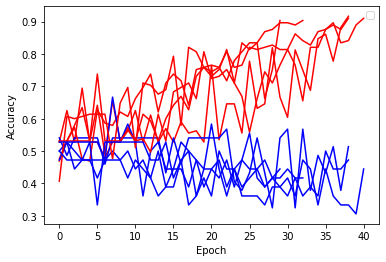

In [412]:
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt
test_avg = []
for train_index, test_index in kf.split(total_data, Y):
  train_dataset=[]
  test_dataset=[]
  print("TRAIN: ", train_index, "TEST:", test_index)
  for i in train_index:
    train_dataset.append(total_data[i])
  for i in test_index:
    test_dataset.append(total_data[i])

  print(len(train_dataset))
  print(len(test_dataset))
  train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

  model = Net(dim=480)
  # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  # optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.6)
  optimizer = torch.optim.Adadelta(model.parameters(), lr=1)

  train_epoch=[]
  test_epoch=[]
  epoch = 1
  train_acc=0
  while train_acc < 0.9 and epoch < 100:
      loss = train(epoch)
      train_acc = test(train_loader)
      test_acc = test(test_loader)
      train_epoch.append(train_acc)
      test_epoch.append(test_acc)
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
          f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
      epoch +=1

  plt.plot(train_epoch, color="red")
  plt.plot(test_epoch, color="blue")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))